In [1]:
import colour_detector
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


/home/zengjinwen/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


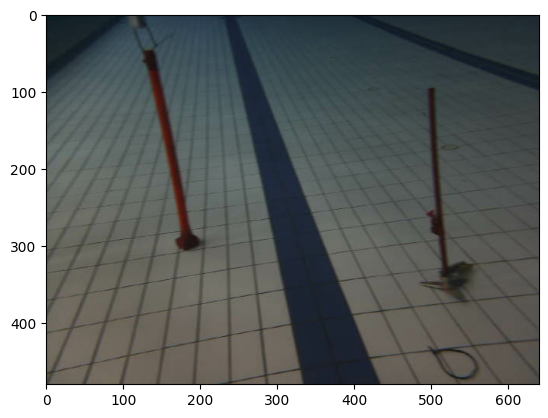

In [2]:
img_path = f'{os.getcwd()}/../resource/imgs/before/1706593128_587679623.png'
img = np.array(cv2.imread(img_path), dtype='uint8')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

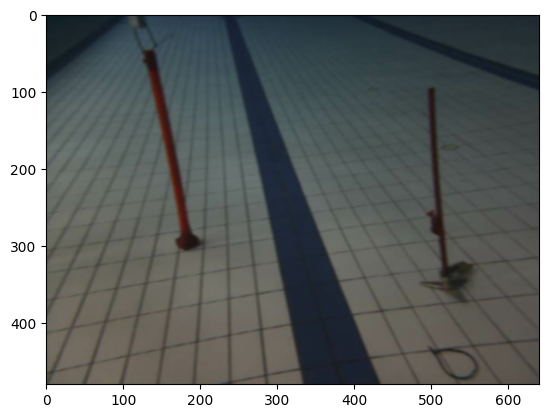

In [3]:
img_blur = cv2.GaussianBlur(img, (5,5), 0) # Blurring
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))

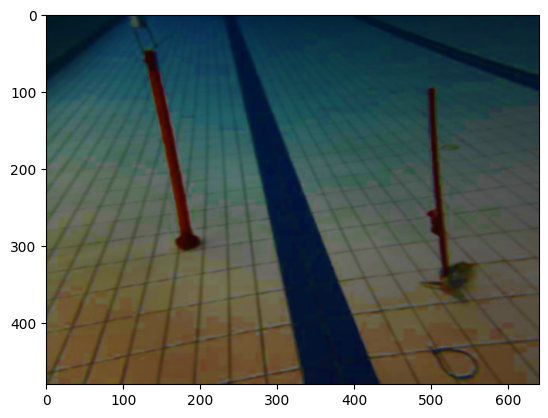

In [5]:
img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)
equ_s = cv2.equalizeHist(s)
equ_v = cv2.equalizeHist(v)
img_hsv_eq = cv2.merge([h, equ_s, v])
plt.imshow(cv2.cvtColor(img_hsv_eq, cv2.COLOR_HSV2RGB))


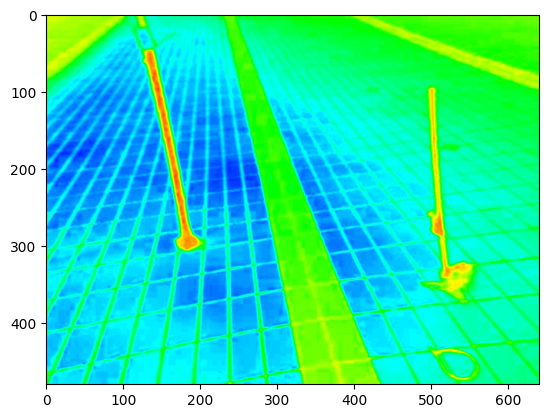

In [30]:
img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)
img_hsv[:,:,2] = 255
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_HSV2RGB))


[[[ 35 255 255]
  [ 35 255 255]
  [ 35 255 255]
  ...
  [ 48 255 255]
  [ 48 255 255]
  [ 48 255 255]]

 [[ 35 255 255]
  [ 35 255 255]
  [ 35 255 255]
  ...
  [ 48 255 255]
  [ 48 255 255]
  [ 48 255 255]]

 [[ 35 255 255]
  [ 35 255 255]
  [ 35 255 255]
  ...
  [ 48 255 255]
  [ 48 255 255]
  [ 48 255 255]]

 ...

 [[ 63 255 255]
  [ 63 255 255]
  [ 64 255 255]
  ...
  [ 75 255 255]
  [ 74 255 255]
  [ 74 255 255]]

 [[ 62 255 255]
  [ 62 255 255]
  [ 64 255 255]
  ...
  [ 75 255 255]
  [ 74 255 255]
  [ 74 255 255]]

 [[ 62 255 255]
  [ 62 255 255]
  [ 64 255 255]
  ...
  [ 75 255 255]
  [ 74 255 255]
  [ 74 255 255]]]


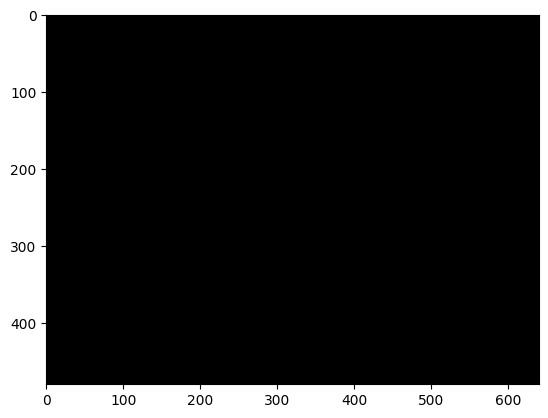

In [34]:

smin, vmin = 40, 40
red1  = cv2.inRange(img_hsv, (  0, smin, vmin), ( 10, 255, 255))
red2  = cv2.inRange(img_hsv, (170, smin, vmin), (179, 255, 255))
orange = cv2.inRange(img_hsv, (10, smin, vmin), (25, 255, 255))
mask = red1 | red2 | orange
#mask = red1 | red2
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN,  kernel, iterations=1)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)
result = cv2.bitwise_and(img_blur, img_blur, mask=mask)
print(img_blur)
#print(result)


plt.imshow(cv2.cvtColor(result, cv2.COLOR_HSV2RGB))
# plt.imshow(cv2.cvtColor(result2, cv2.COLOR_HSV2RGB))

In [ ]:
result = cv2.bitwise_and(img_blur, img_blur, mask=mask)
result2 = cv2.bitwise_and(img_blur, img_blur, mask=mask)
result2[:,:,1:3] = 255

(480, 640)


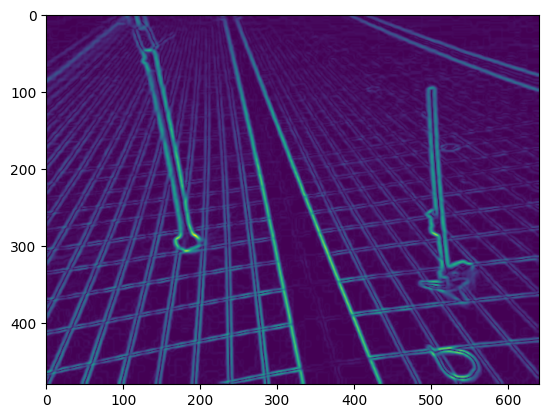

In [87]:
# gray = cv2.Canny(img, 50, 150)
gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
print(gray.shape)
sobel_x =cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y =cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined =cv2.magnitude(sobel_x, sobel_y)
plt.imshow(sobel_combined)

In [66]:
img_morph = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel, iterations=1)
plt.imshow(cv2.cvtColor(img_morph, cv2.COLOR_HSV2RGB))

NameError: name 'kernel' is not defined

In [ ]:
def process_img(image):
    img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV) #convert image to hsv
    equ = cv2.equalizeHist(img_hsv) #histogram equalization
    threshold = cv2.threshold(equ,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #Threshold the image
    plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
    #cv2.imshow("frame", threshold)
    #img_morph = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel, iterations=1) #mask
    #gray = cv2.cvtColor(threshold, cv.COLOR_BGR2GRAY)
    #canny = cv2.Canny(img_morph, 125, 175) #outline the image
    # contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #get the coordinates of the contours
    # for c in contours: #box the object
    #     rect = cv2.boundingRect(c)
    #     x, y, w, h = rect
    #     cv2.rectangle(frame,(x,y),(0,255,0),3)
        #cv2.putText(frame,str(' ))